2. Se intenta mejorar el modelo anterior suponiendo que el desempleo real verifica:

$$y_t = T_t + S_t + v_t$$

siendo $v_t$ el ruido de observación (de varianza $\sigma_v^2$ desconocida). Supondremos además que $T_t$ la tendencia sigue un local-level model.

$$T_t = T_{t-1} + w_{1t}$$

Pero se agrega la componente estacional $S_t$ que verifica:

$$S_t+S_{t-1}+S_{t-2} = w_{2t}$$

que corresponde a decir que la parte estacional suma $0$ en media a lo largo del año.

Escribir este proceso en espacio de estados, y aplicar el método de Newton-Raphson visto arriba para ajustar los valores.


In [1]:
#install.packages("astsa")
library(astsa)
options(repr.plot.width=15, repr.plot.height=8) #ajusta tamaño de graficas

In [2]:
datos = read.csv("datos_nuevos.csv", header=TRUE)
datos_mp= read.csv("datos_MP.csv", sep=";", header=TRUE)

##SUBIR LOS DATOS NUEVOS

In [3]:
datos$Fecha = as.Date(datos$Fecha,format="%d/%m/%y")
str(datos$Fecha)
print(datos$Fecha)

 Date[1:195], format: "2020-01-01" "2020-01-10" "2020-01-20" "2020-02-01" "2020-02-10" ...
  [1] "2020-01-01" "2020-01-10" "2020-01-20" "2020-02-01" "2020-02-10"
  [6] "2020-02-20" "2020-03-01" "2020-03-10" "2020-03-20" "2020-04-01"
 [11] "2020-04-10" "2020-04-20" "2020-05-01" "2020-05-10" "2020-05-20"
 [16] "2020-06-01" "2020-06-10" "2020-06-20" "2020-07-01" "2020-07-10"
 [21] "2020-07-20" "2020-08-01" "2020-08-10" "2020-08-20" "2020-09-01"
 [26] "2020-09-10" "2020-09-20" "2020-10-01" "2020-10-10" "2020-10-20"
 [31] "2020-11-01" "2020-11-10" "2020-11-20" "2020-12-01" "2020-12-10"
 [36] "2020-12-20" "2020-01-01" "2020-01-10" "2020-01-20" "2020-02-01"
 [41] "2020-02-10" "2020-02-20" "2020-03-01" "2020-03-10" "2020-03-20"
 [46] "2020-04-01" "2020-04-10" "2020-04-20" "2020-05-01" "2020-05-10"
 [51] "2020-05-20" "2020-06-01" "2020-06-10" "2020-06-20" "2020-07-01"
 [56] "2020-07-10" "2020-07-20" "2020-08-01" "2020-08-10" "2020-08-20"
 [61] "2020-09-01" "2020-09-10" "2020-09-20" "2020-10-01"

In [4]:
datos_mp$Fecha = as.Date(tail(datos$Fecha,60),format="%d/%m/%y")
str(datos_mp$Fecha)
print(datos_mp$Fecha)

 Date[1:60], format: "2020-10-01" "2020-10-10" "2020-10-20" "2020-11-01" "2020-11-10" ...
 [1] "2020-10-01" "2020-10-10" "2020-10-20" "2020-11-01" "2020-11-10"
 [6] "2020-11-20" "2020-12-01" "2020-12-10" "2020-12-20" "2020-01-01"
[11] "2020-01-10" "2020-01-20" "2020-02-01" "2020-02-10" "2020-02-20"
[16] "2020-03-01" "2020-03-10" "2020-03-20" "2020-04-01" "2020-04-10"
[21] "2020-04-20" "2020-05-01" "2020-05-10" "2020-05-20" "2020-06-01"
[26] "2020-06-10" "2020-06-20" "2020-07-01" "2020-07-10" "2020-07-20"
[31] "2020-08-01" "2020-08-10" "2020-08-20" "2020-09-01" "2020-09-10"
[36] "2020-09-20" "2020-10-01" "2020-10-10" "2020-10-20" "2020-11-01"
[41] "2020-11-10" "2020-11-20" "2020-12-01" "2020-12-10" "2020-12-20"
[46] "2020-01-01" "2020-01-10" "2020-01-20" "2020-02-01" "2020-02-10"
[51] "2020-02-20" "2020-03-01" "2020-03-10" "2020-03-20" "2020-04-01"
[56] "2020-04-10" "2020-04-20" "2020-05-01" "2020-05-10" "2020-05-20"


In [5]:
datos_st=ts(datos$Transacciones,frequency=36)
str(datos_st)

 Time-Series [1:195] from 1 to 6.39: 275463 314152 369147 318266 315779 324747 347009 330038 265119 274217 ...


In [6]:
datosmp_st=ts(datos_mp$Transacciones,frequency=36)
str(datosmp_st)

ERROR: Error in ts(datos_mp$Transacciones, frequency = 36): 'ts' object must have one or more observations


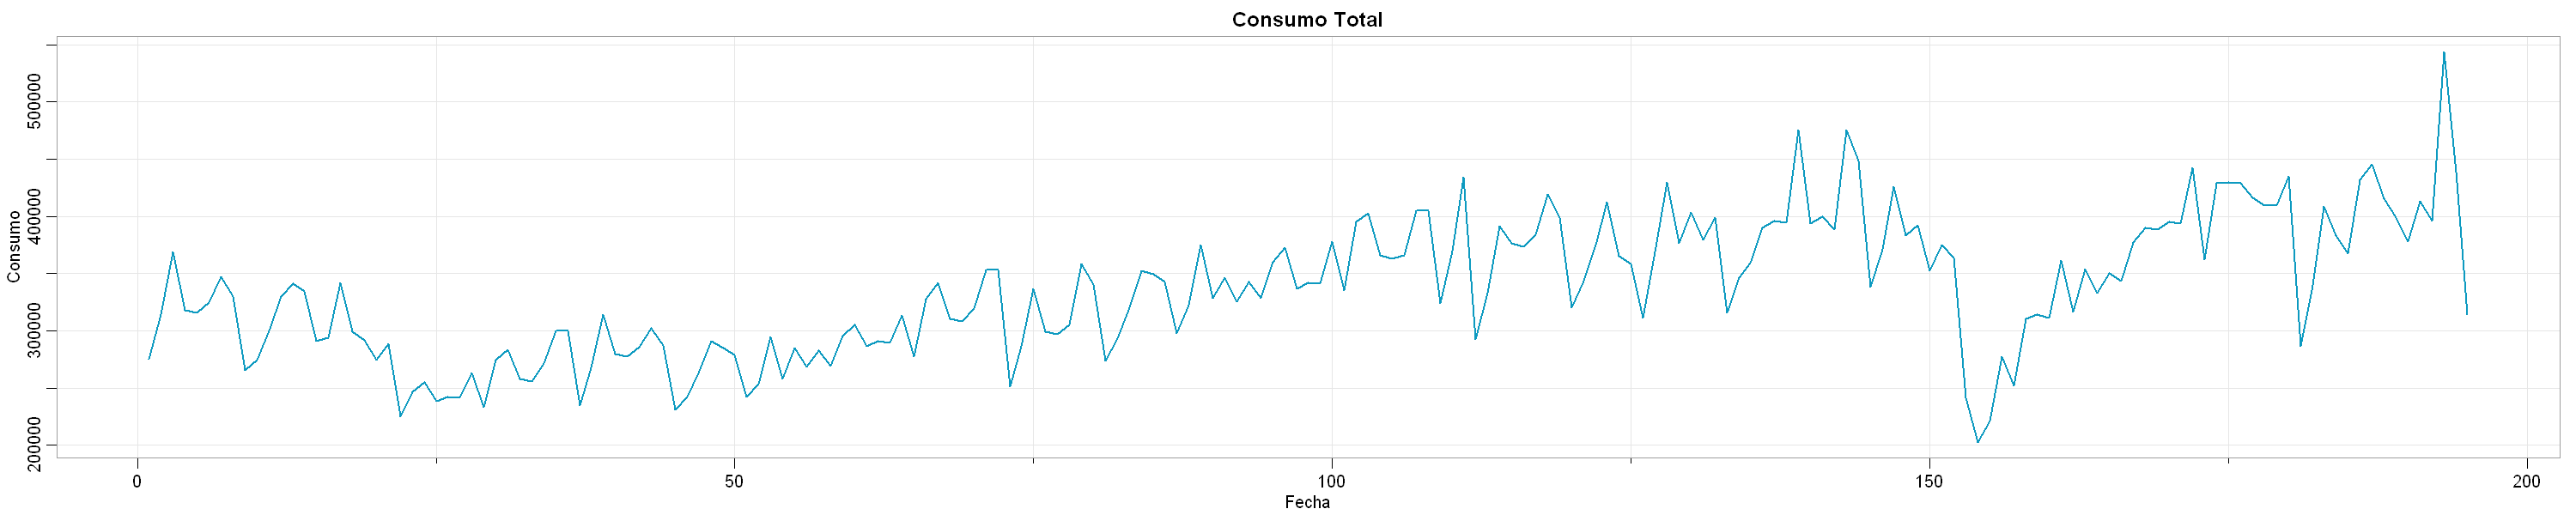

In [7]:
#1- Graficas
options(repr.plot.width=25, repr.plot.height=5) #ajusta tamaño de graficas
tsplot(ts(datos_st),main="Consumo Total",  ylab="Consumo", xlab="Fecha", lwd=2, col=5)

In [9]:
mean(datos_st)
sd(datos_st)

[1] 336414.4

[1] 59390.35

## Parte 1: local level model

* Ecuación de estado:

$$ x_{t+1} = \Phi x_t + w_t.$$

* Ecuación de observación:

$$ y_t = A x_t + v_t,$$

Para este caso: 
$x_t\in \mathbb{R}$,  $y_t\in \mathbb{R}$,  $\Phi=1$,   $Q=\sigma_v^2>0$,  $R=\sigma_v^2>0$,  $A=1$

Se asume además que los ruidos $w_t$ y $v_t$ son independientes, y que el estado inicial $x_0$ tiene una distribución $N(\mu_0,\Sigma_0)$ conocida. Siendo $\mu_0=336414$ y $\Sigma_0=4000$

In [73]:
num=length(datos_st) #largo de observaciones
A=1           #matriz de observación
Phi=1         #matriz de transición

#condición inicial
mu0=336414    #valor cercano al primer valor de la serie
Sigma0=10000  

In [74]:
# Función que evalúa la verosimilitud para los parámetros libres

#Dados los parámetros, se usa Kfilter0 para aplicar filtro de Kalman sin entrada y se computa la verosimilitud.

LikelihoodFunction = function(para){
    cQ = para[1]      # sigma_w
    cR = para[2]      #sigma_v
   
    kf = Kfilter0(num,datos_st,A,mu0,Sigma0,Phi,cQ,cR)
    return(kf$like) 
 }

In [75]:
# Ajuste por maxima verosimilitud:
init.par = c(10000,10000)  # Valores iniciales de los parámetros (varianzas)
est = optim(init.par, LikelihoodFunction, NULL, method="BFGS", hessian=TRUE, control=list(trace=1)) ##optimizador de R
SE = sqrt(diag(solve(est$hessian))) 

# Summary of estimation  
estimate = est$par; u = cbind(estimate, SE)
rownames(u)=c("sigw", "sigv"); u  

initial  value 2476.473676 
final  value 2169.053739 
converged


,estimate,SE
sigw,17134.90,988.6069
sigv,21745.23,772.8296


In [76]:
sQ=abs(u["sigw","estimate"])
sR=abs(u["sigv","estimate"])

In [77]:
#Se hace suavizado de Kalman para hallar el estimado
kf = Ksmooth0(num,datos_st,A,mu0,Sigma0,Phi,sQ,sR)

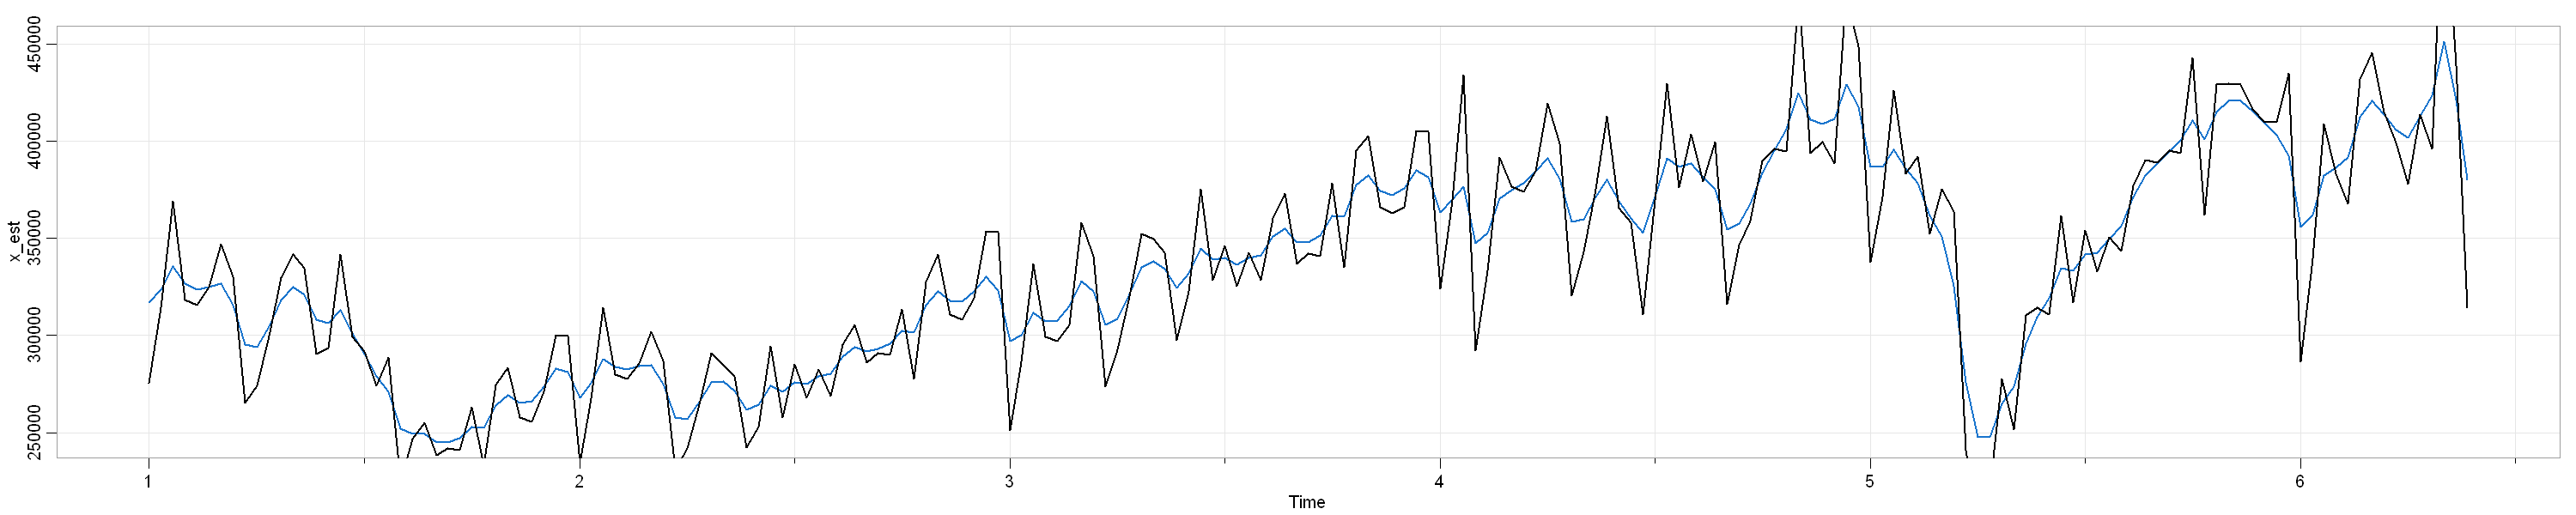

In [78]:
x_est=ts(as.numeric(kf$xs), start=1, freq=36)
tsplot(x_est, col=4, lwd = 2) #trayectoria de estado para el modelo que mejor explica la serie observada
lines(datos_st, col=1, lwd = 2) #lo que observo

[1] 22091

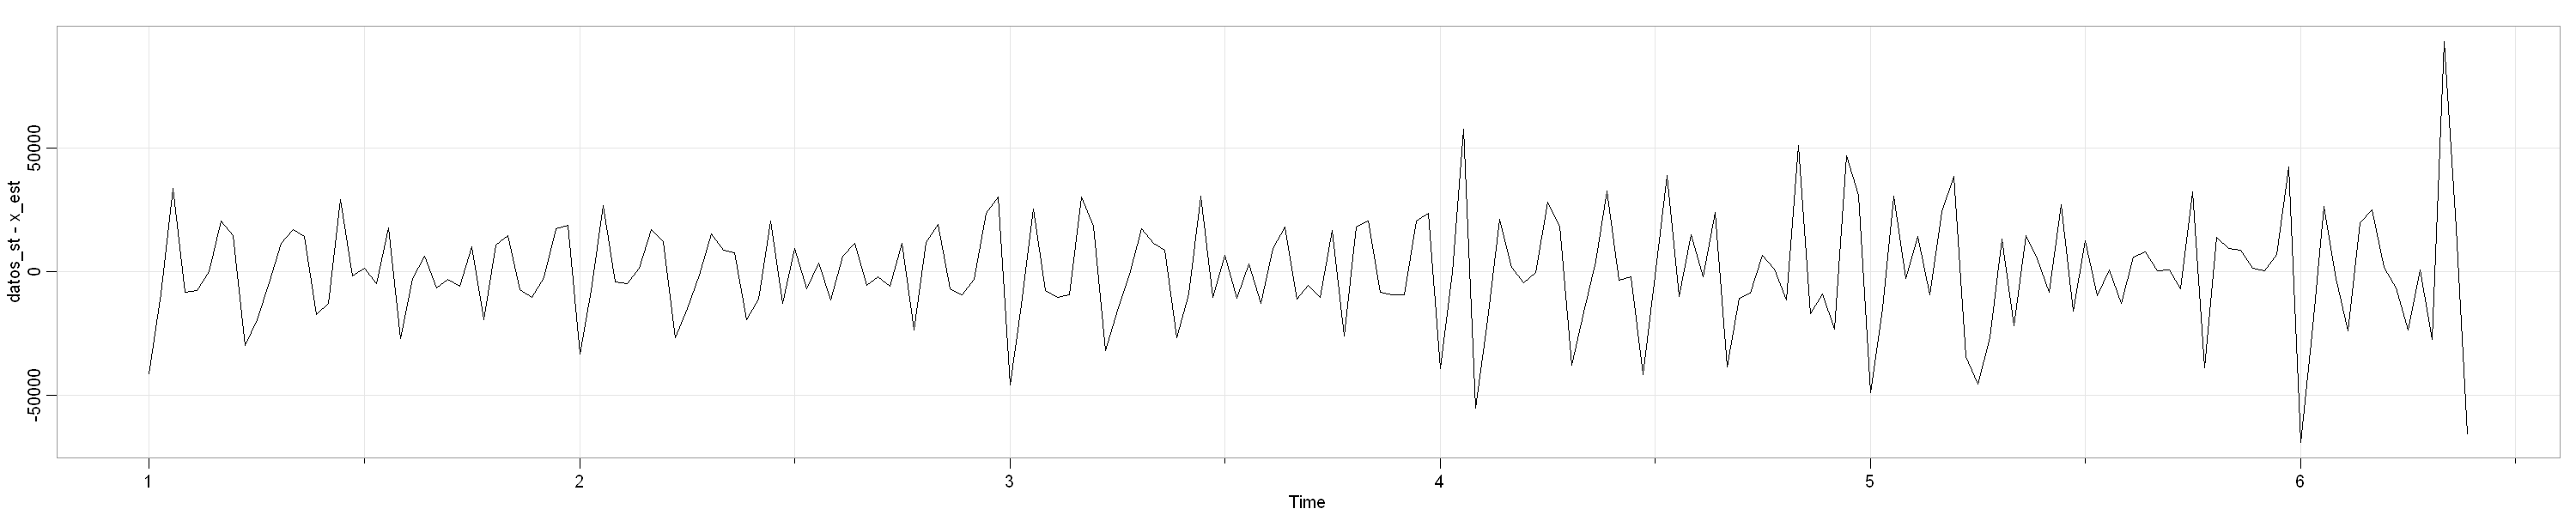

In [79]:
tsplot(datos_st-x_est)
sd(datos_st-x_est)

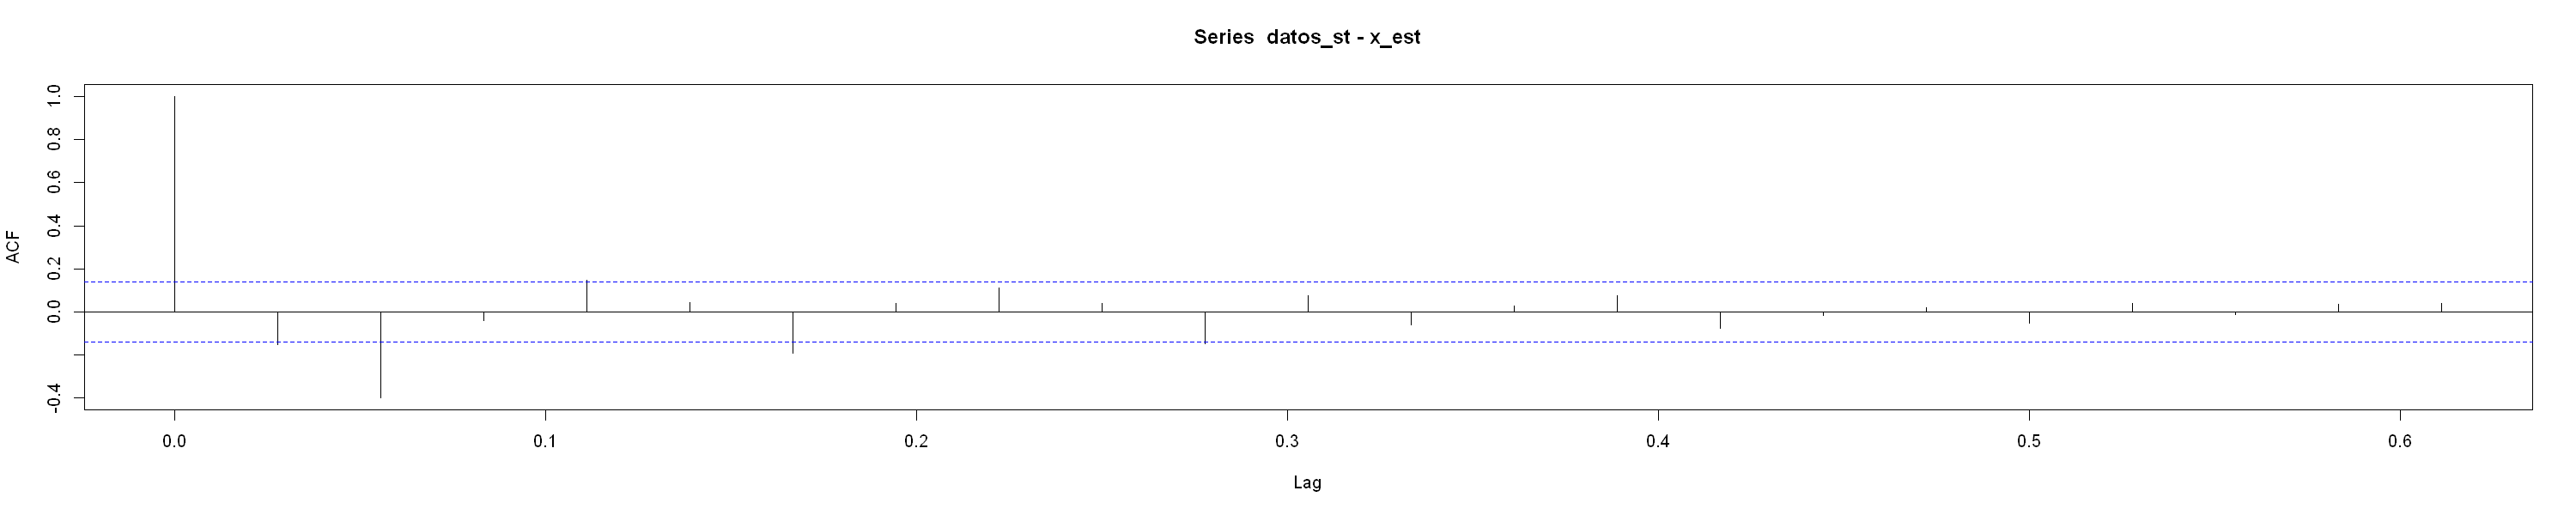

In [80]:
acf(datos_st-x_est)

A partir de la acf del residuo y su varianza, podemos deducir que es un bueno modelo para esta serie.

## Parte 2: Modelo estructural con trend y season
Se intenta mejorar el modelo anterior suponiendo que el desempleo observado verifica:

$$y_t = T_t + S_t + v_t$$

Se supone además que $T_t$ la tendencia sigue un local-level model:

$$T_t = T_{t-1} + w_{1t}$$

Pero se agrega la componente estacional $S_t$ que verifica:

$$S_t+S_{t-1}+S_{t-2} = w_{2t}$$

Siendo  $v_t=\sigma_v^2$,  $w_{1t}=\sigma_{w1}^2$,  $w_{2t}=\sigma_{w2}^2$ y se asumen independientes.

Se define: 
$$x_t = \begin{pmatrix} T_1 \\ S_t \\ S_{t-1} \end{pmatrix}$$

Se tiene el modelo de forma matricial:
$$x_t = \begin{pmatrix} T_1 \\ S_t \\ S_{t-1} \end{pmatrix} = \begin{pmatrix} 1 & 0 & 0 \\ 0 & -1 & -1 \\ 0 & 1 & 0\end{pmatrix} \begin{pmatrix} T_{t-1} \\ S_{t-1} \\ S_{t-2} \end{pmatrix} + \begin{pmatrix} w_{1t} \\ w_{2t} \\ 0 \end{pmatrix}$$

$$y_t = \begin{pmatrix} 1 & 1 & 0 \end{pmatrix}x_t + v_t$$

Por lo tanto:

$\Phi = \begin{pmatrix} 1 & 0 & 0 \\ 0 & -1 & -1 \\ 0 & 1 & 0  \end{pmatrix}$

$A = \begin{pmatrix} 1 & 1 & 0 \end{pmatrix}$

In [58]:
num = length(datos_st)

A = matrix(c(1,1,0), nrow=1, ncol=3)
Phi = matrix(c(1,0,0,0,-1,1,0,-1,0), nrow=3, ncol=3)
mu0 = c(336414,0,0) #condiciones iniciales
Sigma0 = diag(c(5000,4000,4000))

A
Phi
mu0
Sigma0

1,1,0


1,0,0
0,-1,-1
0,1,0


[1] 336414      0      0

5000,0,0
0,4000,0
0,0,4000


Las incógnitas que se tiene son las varianzas de los tres ruidos.

In [59]:
# Función que evalúa la verosimilitud para los parámetros libres

#Dados los parámetros, se usa Kfilter0 para aplicar filtro de Kalman sin entrada y se computa la verosimilitud.

LikelihoodFunction = function(para){
    cQ1 = para[1]      # Q tiene los ruidos sigma_w en la diagonal
    cQ2 = para[2]      
    cQ = matrix(c(cQ1,0,0,0,cQ2,0,0,0,0),3)
    cR = para[3]     #sigma_v
   
    kf = Kfilter0(num,datos_st,A,mu0,Sigma0,Phi,cQ,cR)
    return(kf$like) 
 }

In [60]:
# Ajuste por maxima verosimilitud:
init.par = c(4000,4000, 4000)  # Valores iniciales de los parámetros (varianzas)
est = optim(init.par, LikelihoodFunction, NULL, method="BFGS", hessian=TRUE, control=list(trace=1)) ##optimizador de R
SE = sqrt(diag(solve(est$hessian))) 

# Summary of estimation  
estimate = est$par; u = cbind(estimate, SE)
rownames(u)=c("sigw1", "sigw2", "sigv"); u  

initial  value 3816.140458 
iter  10 value 2188.864673
final  value 2186.243764 
converged


,estimate,SE
sigw1,19817.39,1173.3836
sigw2,14743.98,731.5177
sigv,20214.22,528.7949


In [61]:
rownames(u)=c("sigw1", "sigw2", "sigv"); u  

,estimate,SE
sigw1,19817.39,1173.3836
sigw2,14743.98,731.5177
sigv,20214.22,528.7949


In [62]:
sigmaw1=abs(u["sigw1","estimate"])
sigmaw2=abs(u["sigw2","estimate"])
sigmav=abs(u["sigv","estimate"])

cQ1 = sigmaw1
cQ2 = sigmaw2
cQ = matrix(c(cQ1,0,0,0,cQ2,0,0,0,0),3)
cR = sigmav

kf = Ksmooth0(num,datos_st,A,mu0,Sigma0,Phi,cQ,cR)
Tt = kf$xs[1,1,]
St = kf$xs[2,1,]

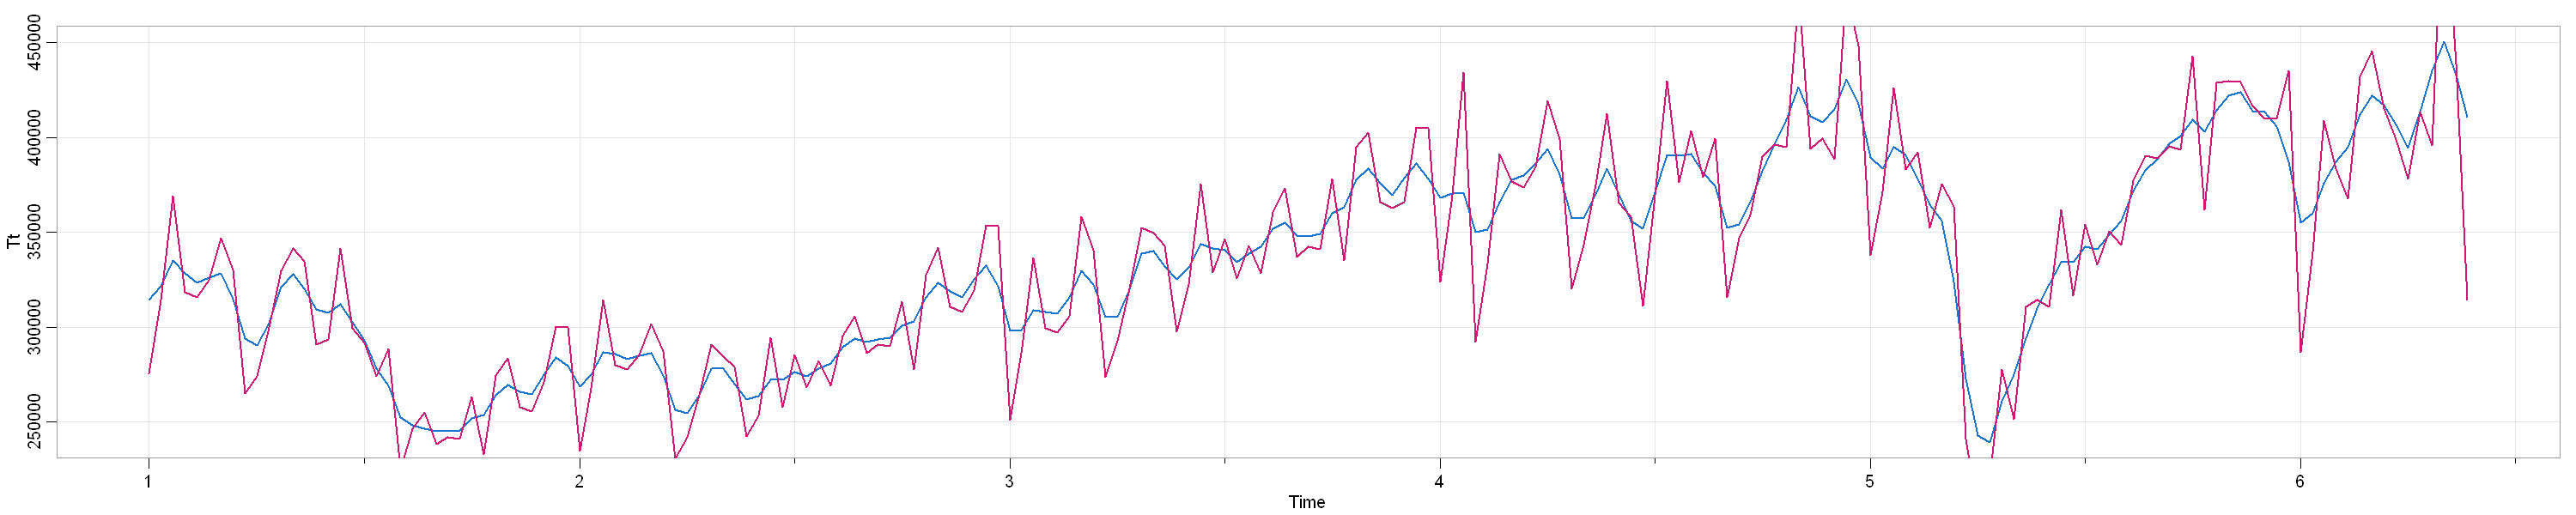

In [65]:
Tt = ts(Tt, start=1,freq=36)
St = ts(St, start=1,freq=36)

tsplot(Tt,col=4, lwd = 2)
lines(datos_st,col=6, lwd = 2)

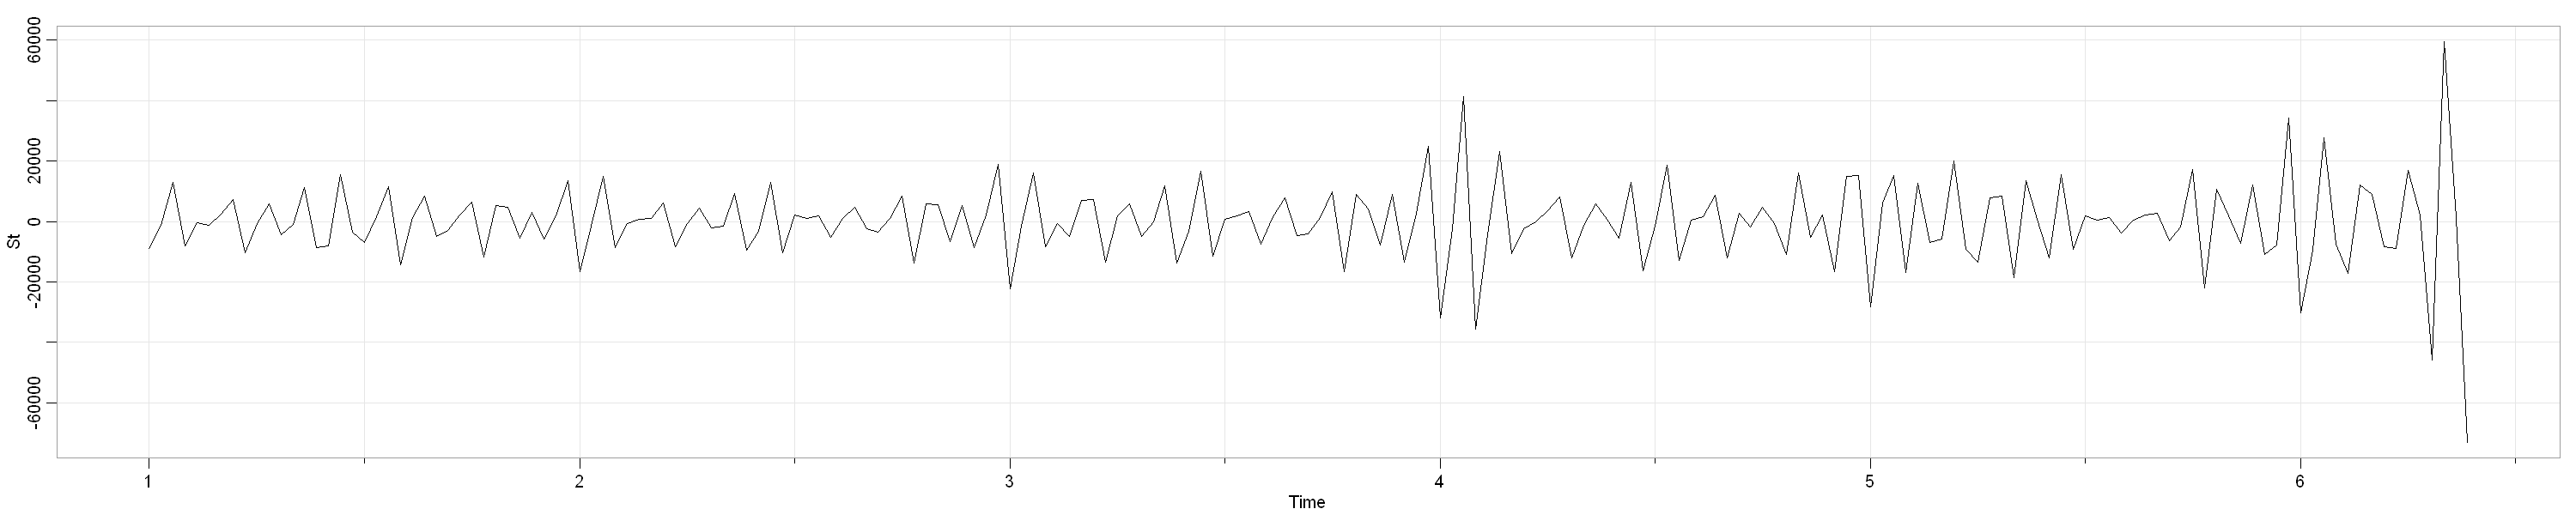

In [66]:
tsplot(St)  #componente estacional

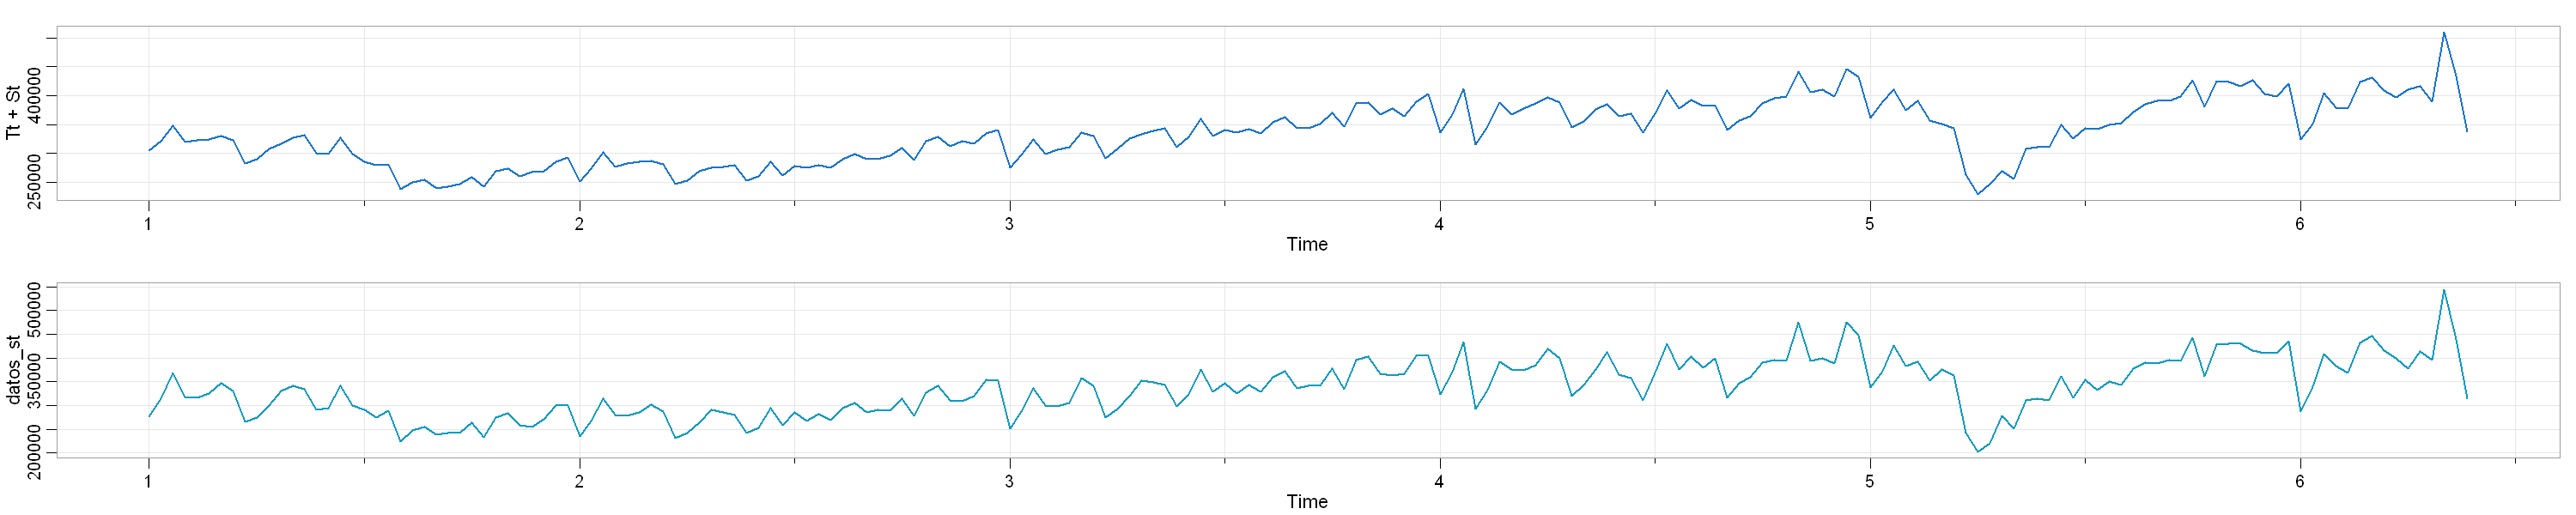

In [67]:
tsplot(cbind(Tt+St,datos_st), lwd=2, col=4:5)

Se puede observar que $T_t + S_t$ dan casi parecido a la observación $y_t$ debido a que el ruido es chico. Por lo que puede explicar la señal por una tendencia y una componente estacional.

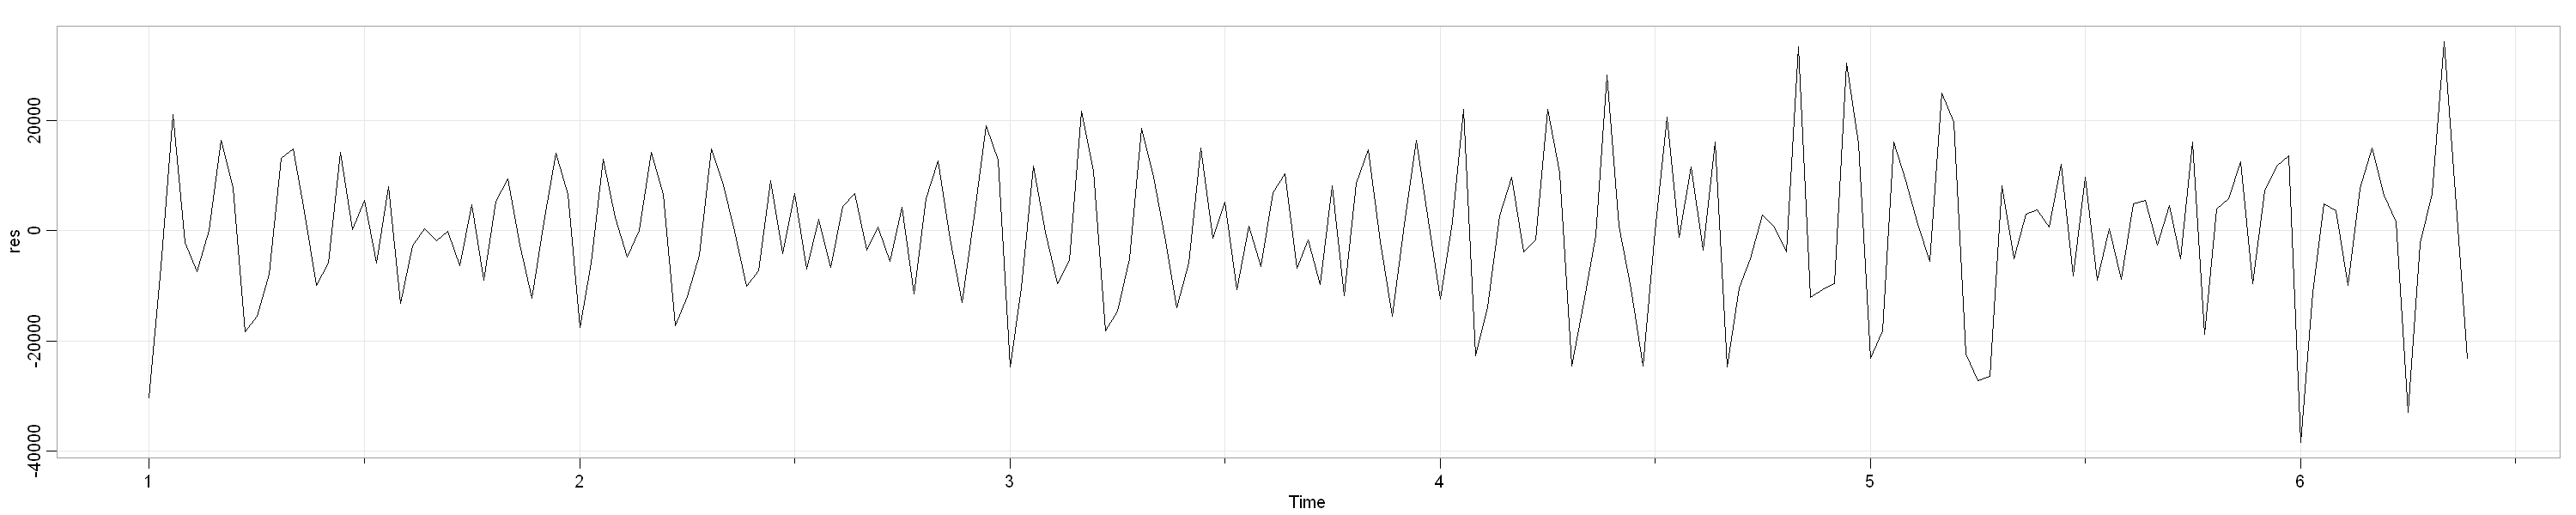

In [68]:
res = datos_st - Tt - St
tsplot(res)

[1] 12708.37

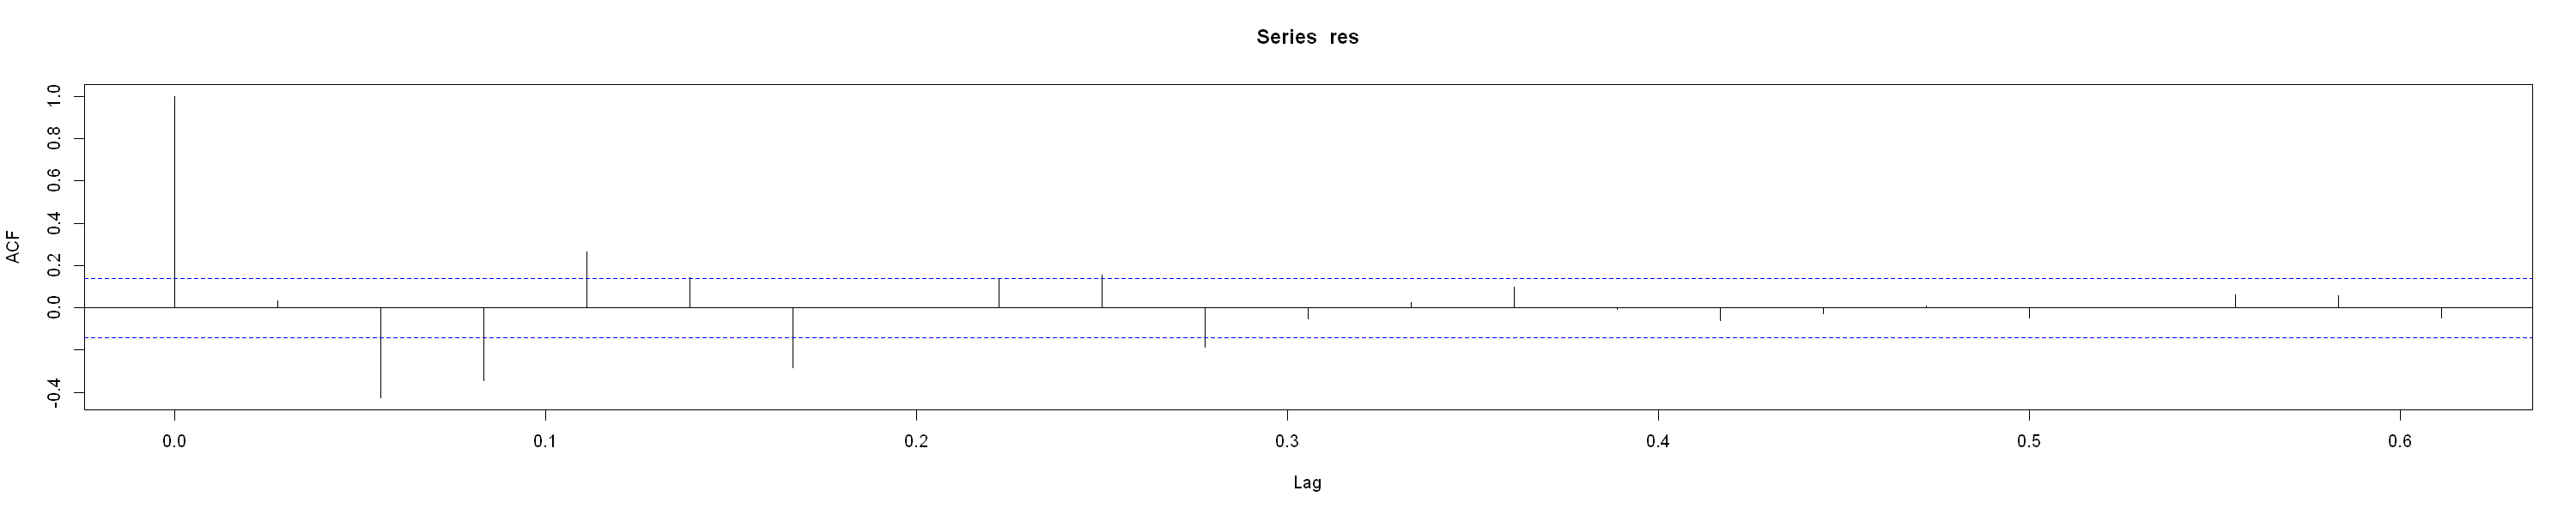

In [69]:
acf(res)
sd(res)

Se puede observar que el valor de $\Phi$ al que converge el modelo es 1. Lo cual es el modelo que se realizó en la parte 2.
El error de observación da cercano a cero, por lo que los valores observados son parecidos al residuo. Sin embargo, en este caso, el gráfico de acf muestra tendencias marcadas.